In [42]:
import pandas as pd
from matplotlib import pyplot as plt
from textattack.augmentation import EasyDataAugmenter
import uuid


In [43]:
df=pd.read_csv("../resources/dataset_train_comments_v1.csv")
df=df.rename(columns={"c.commentId":"commentId"})

### View Category

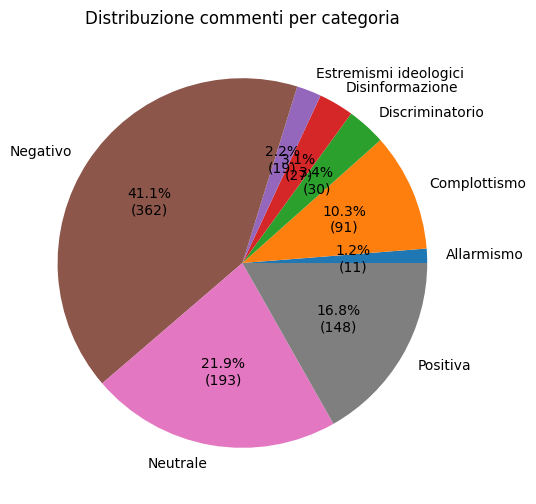

In [45]:
# Raggruppa e conta
counts = df.groupby("category")["commentId"].count()

# Grafico a torta con percentuali e numeri assoluti
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

counts.plot(
    kind="pie",
    autopct=lambda pct: func(pct, counts),
    ylabel="",  # rimuove l'etichetta asse Y
    figsize=(6, 6)
)

plt.title("Distribuzione commenti per categoria")
plt.show()

### Aumento Commenti Categoria Complottismo

In [46]:
# Augmenter con 30% di modifiche
augmenter = EasyDataAugmenter(pct_words_to_swap=0.3, transformations_per_example=2)

df_aug={"commentId":[],"text":[],"category":[]}

for idx, row in df[df["category"] == "Complottismo"].iterrows():
    augmented_sentences = augmenter.augment(row["text"])
    for s in augmented_sentences:
        df_aug["commentId"].append(uuid.uuid4())
        df_aug["text"].append(s)
        df_aug["category"].append("Complottismo")


[nltk_data] Downloading package omw-1.4 to /home/xamon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Aumento Commenti Categoria Discriminatorio

In [47]:
# Augmenter con 30% di modifiche
augmenter = EasyDataAugmenter(pct_words_to_swap=0.3, transformations_per_example=10)

for idx, row in df[df["category"] == "Discriminatorio"].iterrows():
    augmented_sentences = augmenter.augment(row["text"])
    for s in augmented_sentences:
        df_aug["commentId"].append(uuid.uuid4())
        df_aug["text"].append(s)
        df_aug["category"].append("Discriminatorio")

[nltk_data] Downloading package omw-1.4 to /home/xamon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Aumento Commenti Categoria Disinformazione

In [48]:
augmenter = EasyDataAugmenter(pct_words_to_swap=0.3, transformations_per_example=6)

for idx, row in df[df["category"] == "Disinformazione"].iterrows():
    augmented_sentences = augmenter.augment(row["text"])
    for s in augmented_sentences:
        df_aug["commentId"].append(uuid.uuid4())
        df_aug["text"].append(s)
        df_aug["category"].append("Disinformazione")

[nltk_data] Downloading package omw-1.4 to /home/xamon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Aumento Commenti Categoria Estremismi ideologici

In [49]:
augmenter = EasyDataAugmenter(pct_words_to_swap=0.3, transformations_per_example=9)

for idx, row in df[df["category"] == "Estremismi ideologici"].iterrows():
    augmented_sentences = augmenter.augment(row["text"])
    for s in augmented_sentences:
        df_aug["commentId"].append(uuid.uuid4())
        df_aug["text"].append(s)
        df_aug["category"].append("Estremismi ideologici")

[nltk_data] Downloading package omw-1.4 to /home/xamon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Aumento Commenti Categoria Allarmismo

In [50]:
augmenter = EasyDataAugmenter(pct_words_to_swap=0.3, transformations_per_example=11)

for idx, row in df[df["category"] == "Allarmismo"].iterrows():
    augmented_sentences = augmenter.augment(row["text"])
    for s in augmented_sentences:
        df_aug["commentId"].append(uuid.uuid4())
        df_aug["text"].append(s)
        df_aug["category"].append("Allarmismo")

[nltk_data] Downloading package omw-1.4 to /home/xamon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [51]:
new_df = pd.DataFrame(df_aug)
df = pd.concat([df, new_df], ignore_index=True)

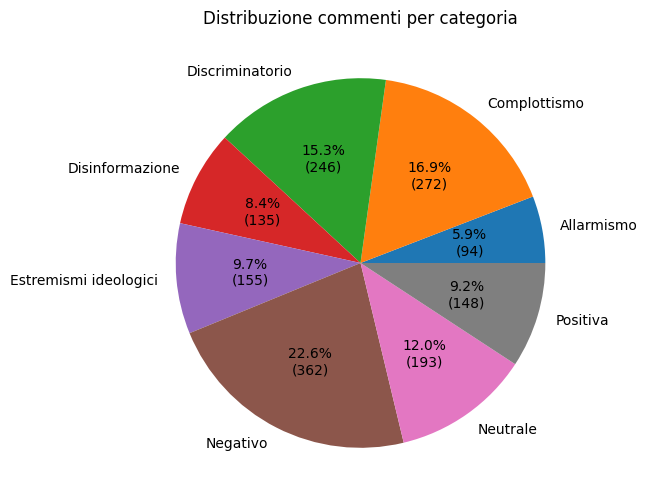

In [52]:
# Raggruppa e conta
counts = df.groupby("category")["commentId"].count()

# Grafico a torta con percentuali e numeri assoluti
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

counts.plot(
    kind="pie",
    autopct=lambda pct: func(pct, counts),
    ylabel="",  # rimuove l'etichetta asse Y
    figsize=(6, 6)
)

plt.title("Distribuzione commenti per categoria")
plt.show()

In [53]:
df.to_csv("dataset_train_comments_v1.2.csv")